# Cincinnati, Ohio Hourly Weather Forecast

### Gathering Data

In [2]:
# Import Python Libraries
import pandas as pd 
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
# website url for hourly weather forecast
url = "https://www.wcpo.com/weather/hourly-forecast"

In [4]:
# Request source code from the web
page = requests.get(url)

In [5]:
# Parse html using BeautifulSoup
soup = BeautifulSoup(page.content, 'lxml')
items = soup.find_all("div", class_="WeatherHourly")

# Loop through hourly data
day = [item.find(class_="data-cover day-view today").get_text() for item in items]
conditions= [item.find(class_="data-cover descrip-text").get_text() for item in items]
temp = [item.find(class_="data-cover hi-lo-day").get_text()[:-2] for item in items]
precip = [item.find(class_="data-cover precip-daily-forecast").get_text()[:-2] for item in items]

In [6]:
# create DataFrame from list
df = pd.DataFrame({"Day": day, 
                "Conditions" : conditions,
                "Temp (°F)" : temp, 
                "Precip (%)" : precip}, )

### Assessing  & Cleaning Data

In [7]:
# Display few rows of data
df.head()

,Day,Conditions,Temp (°F),Precip (%)
0,\nMonday\n09:00 PM,\nCloudy\n,\n47,\n 0
1,\nMonday\n10:00 PM,\nCloudy\n,\n48,\n 0
2,\nMonday\n11:00 PM,\nCloudy\n,\n49,\n 4
3,\nTuesday\n12:00 AM,\nCloudy\n,\n50,\n 8
4,\nTuesday\n01:00 AM,\nShowers\n,\n51,\n 42


In [8]:
# Count of data
print(len(df))

48


In [9]:
# Remove newline characters
for col in df.columns:
    df[col]= df[col].str.replace("\n", " ").str.strip()

In [10]:
# Display the first 5 rows data after cleaning 
df.head()

,Day,Conditions,Temp (°F),Precip (%)
0,Monday 09:00 PM,Cloudy,47,0
1,Monday 10:00 PM,Cloudy,48,0
2,Monday 11:00 PM,Cloudy,49,4
3,Tuesday 12:00 AM,Cloudy,50,8
4,Tuesday 01:00 AM,Showers,51,42


In [11]:
# Concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
Day           48 non-null object
Conditions    48 non-null object
Temp (°F)     48 non-null object
Precip (%)    48 non-null object
dtypes: object(4)
memory usage: 1.6+ KB


In [12]:
# Convert datatypes of "Temp (°F)" & "Precip (%)" columns to "int64"
df = df.astype({"Temp (°F)" : "int64", 
           "Precip (%)" : "int64"})

In [13]:
# Datatypes after removing a newline character
df.dtypes

Day           object
Conditions    object
Temp (°F)      int64
Precip (%)     int64
dtype: object

In [14]:
# A short Statistical summary of the Temp column
df["Temp (°F)"].describe()

count    48.000000
mean     41.770833
std       8.498409
min      27.000000
25%      34.000000
50%      42.000000
75%      50.250000
max      52.000000
Name: Temp (°F), dtype: float64

In [15]:
# Return data for minimum temperature
df.loc[df["Temp (°F)"]== df["Temp (°F)"].min()]

,Day,Conditions,Temp (°F),Precip (%)
34,Wednesday 07:00 AM,Mostly Clear,27,6


In [16]:
# Return data for maximum temperature
df.loc[df["Temp (°F)"]== df["Temp (°F)"].max()]

,Day,Conditions,Temp (°F),Precip (%)
7,Tuesday 04:00 AM,Light Rain,52,63
8,Tuesday 05:00 AM,Light Rain,52,63
9,Tuesday 06:00 AM,Light Rain,52,63
13,Tuesday 10:00 AM,Showers,52,50


### Data Visualization

In [17]:
plt.style.use("ggplot")

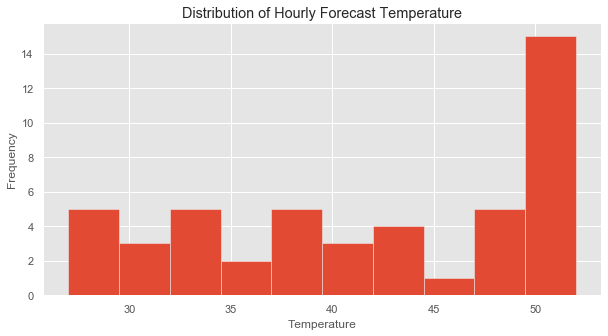

In [18]:
df["Temp (°F)"].hist(figsize = (10, 5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Forecast Temperature");

In [19]:
# 'Conditions' column unique values
df["Conditions"].unique()

array(['Cloudy', 'Showers', 'Light Rain', 'Few Showers', 'Mostly Cloudy',
       'Partly Cloudy', 'Mostly Clear', 'Mostly Sunny', 'Sunny'],
      dtype=object)

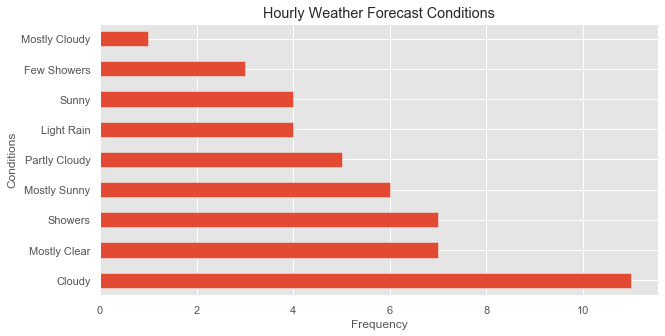

In [20]:
# Plot the distribution of hourly weather coditions 
df["Conditions"].value_counts().plot.barh(figsize = (10, 5))
plt.xlabel("Frequency")
plt.ylabel("Conditions")
plt.title("Hourly Weather Forecast Conditions");

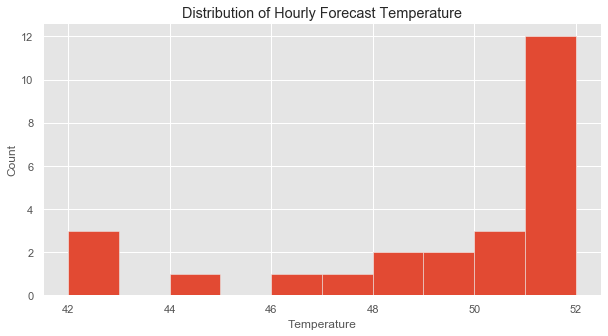

In [23]:
# Distribution of temperature for greater than the average value
df_greater_than_avg= df[df["Temp (°F)"] > df["Temp (°F)"].mean()]
df_greater_than_avg["Temp (°F)"].hist(figsize=(10, 5))
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Distribution of Hourly Forecast Temperature");